<link rel="stylesheet" href="estilo.css">

<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Mineração de Dados

## Pré-Processamento de Dados no Conjunto de Dados Shelter Animals
    
---

## Problema: predição do destino de animais em abrigos

- Aproximadamente 7,6 milhões de animais são recolhidos em abrigos. Muitos desses animais tem a sorte de voltar aos seus donos ou ainda serem adotados, mas não todos contam com essa sorte. Muitos animais esperam a vida inteira por uma família que possa adotá-lo. 2.7 milhões de cachorros e gatos sofrem eutanasia todo ano nos estados unidos. O Centro Animal de Austin divulgou dados sobre mais de 25.000 animais para a comunidade de Data Mining auxiliá-los a predizer qual será o destino dos animais. Mais informações no site da [Kaggle](https://www.kaggle.com/c/shelter-animal-outcomes)

## Visão Geral dos Dados

In [1]:
library(data.table)
dt <- fread("data/train.csv")
head(dt,5)

AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


## Ativdade

- (1) Apresente tabelas com a frequência (contagem e percentual) dos possíveis valores dos atributos **AnimalType**, **SexuponOutcome** e **AgeuponOutcome**. Apresente um gráfico para esses atributos que também mostre a frequência ou proporção dos possíveis valores.

In [2]:
n <- nrow(dt)
dt[,.(contagem = .N, percentual = .N/n),by=.(AnimalType)]

AnimalType,contagem,percentual
Dog,15595,0.5834487
Cat,11134,0.4165513


- (2) O atributo **AgeuponOutcome** descreve quantidades mas é apresentado de forma nominal, misturando anos, meses e semanas. Transforme o atributo AgeuponOutcome para número de dias **DaysuponOutcome**. Transforme o atributo DaysuponOutcome em um atributo discreto (não substitua o atributo original, crie novos atributos), utilizando as seguintes técnicas:

    a. Intervalos de tamanho pré-definidos. Intervalos: [0;1095), [1095;2555), [2555,4380] dias. (atributo *DaysuponOutcome. intervalo_a*)

    b. Intervalos de igual tamanho, sendo o tamanho 3 intervalos. (atributo *DaysuponOutcome.intervalo_b*)

    c. Intervalos com o mesmo número de elementos, sendo 10 intervalos. (atributo *DaysuponOutcome.intervalo_c*)
    
    d. Faça gráficos mostrar como ficou a distribuição dos valores utilizando os diferentes intervalos, nas questões a) e b), para a questão c) calcule a média e o desvio padrão de cada intervalo.

In [26]:
dt.aux <- data.table(AgeuponOutcome = dt$AgeuponOutcome)
dt.aux <- dt.aux[, c("Numero","Unidade") := tstrsplit(AgeuponOutcome," ",fixed=T) ]

dt.aux$Unidade <- gsub("year(\\w?)" ,"365", dt.aux$Unidade )
dt.aux$Unidade <- gsub("month(\\w?)","30",  dt.aux$Unidade )
dt.aux$Unidade <- gsub("week(\\w?)" ,"7",   dt.aux$Unidade )
dt.aux$Unidade <- gsub("day(\\w?)"  ,"1",   dt.aux$Unidade )
dt.aux$Unidade <- gsub("^$"         ,"-1",  dt.aux$Unidade )

dt$DaysuponOutcome <- as.numeric(dt.aux$Numero) * as.numeric(dt.aux$Unidade)

In [44]:
dt$DaysuponOutcome[2481]
which(dt$AgeuponOutcome == "")


[1] NA

[1]  2481  2913  3767  3876  4499  5138  5692  7006  8421 17465 18491 19928
[13] 21524 22381 22449 24329 26552 26571

In [5]:
dt$DaysuponOutcome <- dt$AgeuponOutcome;
dt$DaysuponOutcome <- gsub("year(\\w?)" ,"* 365", dt$DaysuponOutcome)
dt$DaysuponOutcome <- gsub("month(\\w?)","* 30", dt$DaysuponOutcome)
dt$DaysuponOutcome <- gsub("week(\\w?)"  ,"* 7", dt$DaysuponOutcome)
dt$DaysuponOutcome <- gsub("day(\\w?)"  ,"* 1", dt$DaysuponOutcome)
dt$DaysuponOutcome <- gsub("^$"  ,"-1", dt$DaysuponOutcome)

dt$DaysuponOutcome <- sapply( dt$DaysuponOutcome, 
                             function (x) eval(parse(text=x)))  
dt$DaysuponOutcome <- as.numeric(dt$DaysuponOutcome)

In [7]:
head(dt,4)

AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DaysuponOutcome
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730
A683430,,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


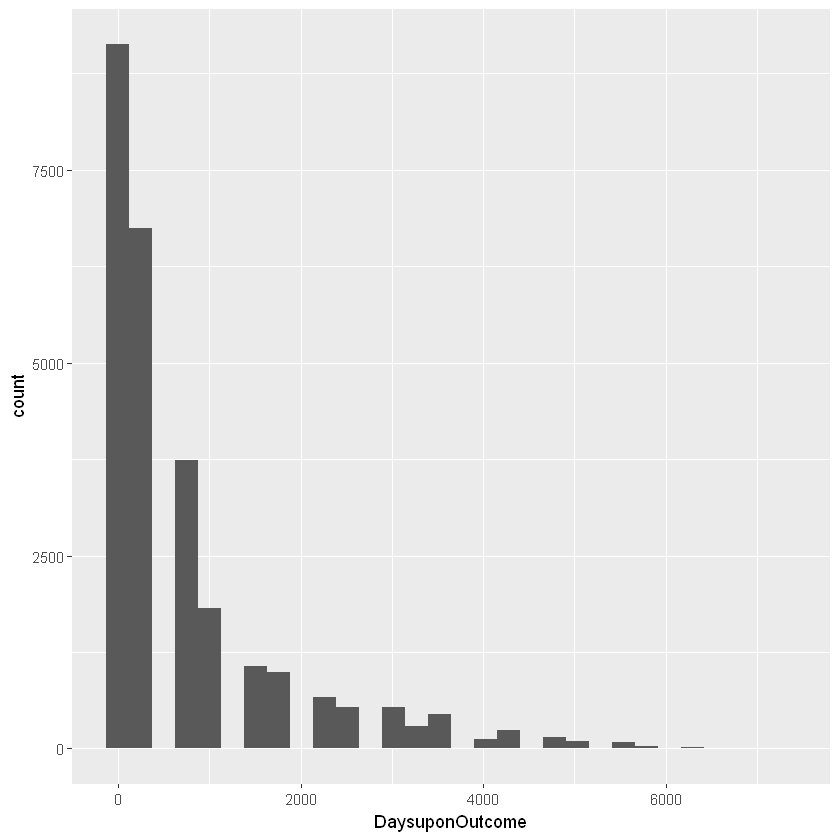

In [8]:
library(ggplot2)
ggplot(dt, aes(x=DaysuponOutcome)) + geom_histogram()

- (3) Ainda em relação ao atributo **DaysuponOutcome**, calcule:

    a. Média, desvio padrão.

    b. Mediana, Valor mínimo e Valor máximo.

    c. Crie os novos atributos com os valores normalizados com as técncias de normalização linear, desvio padrão e valor máximo.

- (4) Mostre o novo conjunto de dados incluíndo os atributos criados e seus valores.

- (5) O atributo **DateTime** corresponde à data e hora do animal aochegar ao abrigo. Extraia diferentes informações sobre esse atributo complexo: como o período (manhã, tarde, noite, madrugada), dia da semana em número, dia da semana extenso, entre outros. Procurar na documentação do pacote *libridate*.